<a href="https://colab.research.google.com/github/TanChen168/Week9_UnsupervisedLearning/blob/main/WholesaleCustomers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

filename = '/content/sample_data/Wholesale customers data.csv'
customers = pd.read_csv(filename)
df = customers[['Fresh', 'Grocery']]
df.head()

,Fresh,Grocery
0,12669,7561
1,7057,9568
2,6353,7684
3,13265,4221
4,22615,7198


In [37]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [8]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(df)

In [38]:
# Instantiate KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(scaled_df)

KMeans(n_clusters=3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


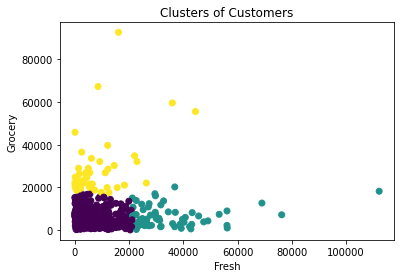

In [39]:
# Save the cluster lables to the dataframe 
df['cluster'] = kmeans.labels_

# Visualize the clusters
plt.scatter(df['Fresh'], df['Grocery'], c = df['cluster'])
plt.xlabel('Fresh')
plt.ylabel('Grocery')
plt.title('Clusters of Customers');

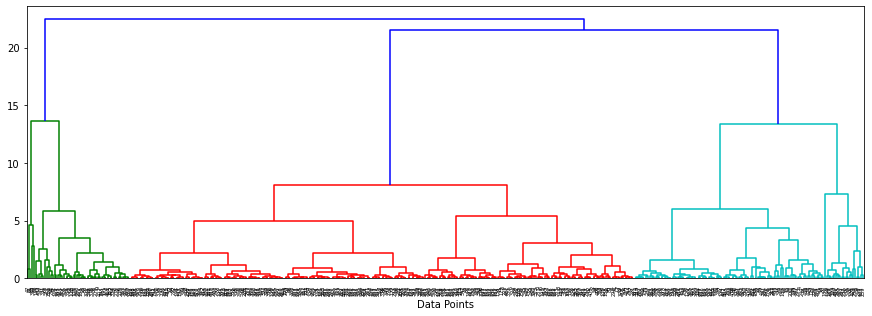

In [15]:
# Visualize Dendogram
plt.figure(figsize = (15, 5))
sch.dendrogram(sch.linkage(scaled_df, method = 'ward'))
plt.xlabel('Data Points');

In [40]:
# Instantiate clustering
hc = AgglomerativeClustering(n_clusters = 3)
hc.fit(scaled_df)

AgglomerativeClustering(n_clusters=3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


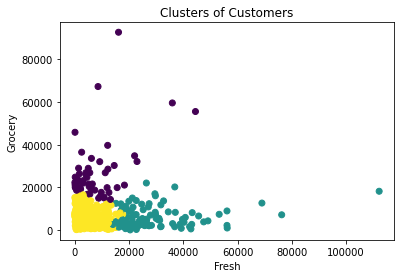

In [41]:
# Save the cluster lables to the dataframe 
df['cluster'] = hc.labels_
# Visualize the clusters
plt.scatter(df['Fresh'], df['Grocery'], c = df['cluster'])
plt.xlabel('Fresh')
plt.ylabel('Grocery')
plt.title('Clusters of Customers');

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


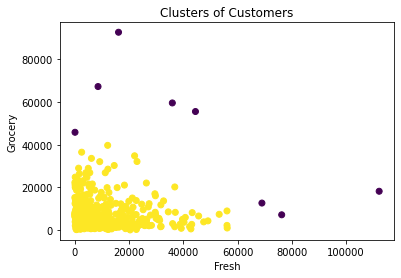

In [123]:
# Instantiate & fit clustering - this is done in one step for DBSCAN
dbs = DBSCAN(eps = 0.9, min_samples = 7).fit(scaled_df)
# Save the cluster lables to the dataframe 
df['cluster'] = dbs.labels_
# Visualize the clusters
plt.scatter(df['Fresh'], df['Grocery'], c = df['cluster'])
plt.xlabel('Fresh')
plt.ylabel('Grocery')
plt.title('Clusters of Customers');

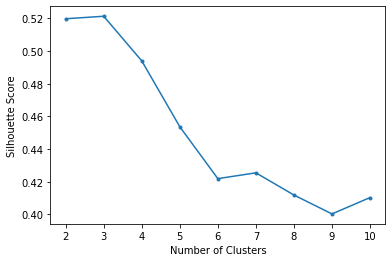

In [21]:
# Visualize different silhouette scores
# Save silhouette scores for various cluster numbers in list
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

In [29]:
# Fit kmeans model with 2 clusters and display the silhouette score
kmeans = KMeans(n_clusters = 3)
kmeans.fit(scaled_df)
silhouette_score(scaled_df, kmeans.labels_)

0.520208626150799

In [33]:
# See Hierarchical clustering silhouette score
hc = AgglomerativeClustering(n_clusters = 2)
hc.fit(scaled_df)
silhouette_score(scaled_df, hc.labels_)

0.5016928448384317

In [124]:
# See DBSCAN silhouette score
dbs = DBSCAN(eps = 0.2, min_samples = 4).fit(scaled_df)
silhouette_score(scaled_df, dbs.labels_)

0.10949709794723311